Stable **Diffusion** is a latent text-to-image diffusion model capable of generating photo-realistic images given any text input. This model card gives an overview of all available model checkpoints. For more in-detail model cards, please have a look at the model repositories listed under Model Access.

In [ ]:
#import necessary libraries diffusers transformers
%pip install --quiet --upgrade diffusers transformers accelerate invisible_watermark mediapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.1/989.1 kB 10.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.9 MB/s eta 0:00:00


In [ ]:
# next set refiner is to false
use_refiner=False

In [ ]:
#import necessary libraries like media, random, sys and torch
import mediapy as media
import random
import sys
import torch
#all are successfully added in the google colab.


In [ ]:
#one more call that is diffusers
from diffusers import DiffusionPipeline

In [ ]:
from diffusers.utils.import_utils import USE_SAFETENSORS
#create our pipeline from DiffusionPipeline.pretrained
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    USE_SAFETENSORS=True,
    variant="fp16"
)

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Keyword arguments {'USE_SAFETENSORS': True} are not expected by StableDiffusionXLPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
#so, it takes some time for downloading.
#next, we can use that.
if use_refiner:
      refiner= DiffusionPipeline.from_pretrained(
        "stabilityai/stable-diffusion-xl-base-1.0",
        text_encoder_2=pipe.text_encoder_2,
        vae=pipe.vae,
        torch_dtype=torch.float16,
        USE_SAFETENSORS=True,
        variant="fp16"
)
      refiner = refiner.to("cuda")
      pipe.enable_model_cpu_offload()
else:
    pipe=pipe.to("cuda")

**Now we can create our own Prompt**

Please enter your prompt...a bunch of rose flower in front of train engine


  0%|          | 0/50 [00:00<?, ?it/s]

Prompt :	a bunch of rose flower in front of train engine
Seed:	437748388924920033


""

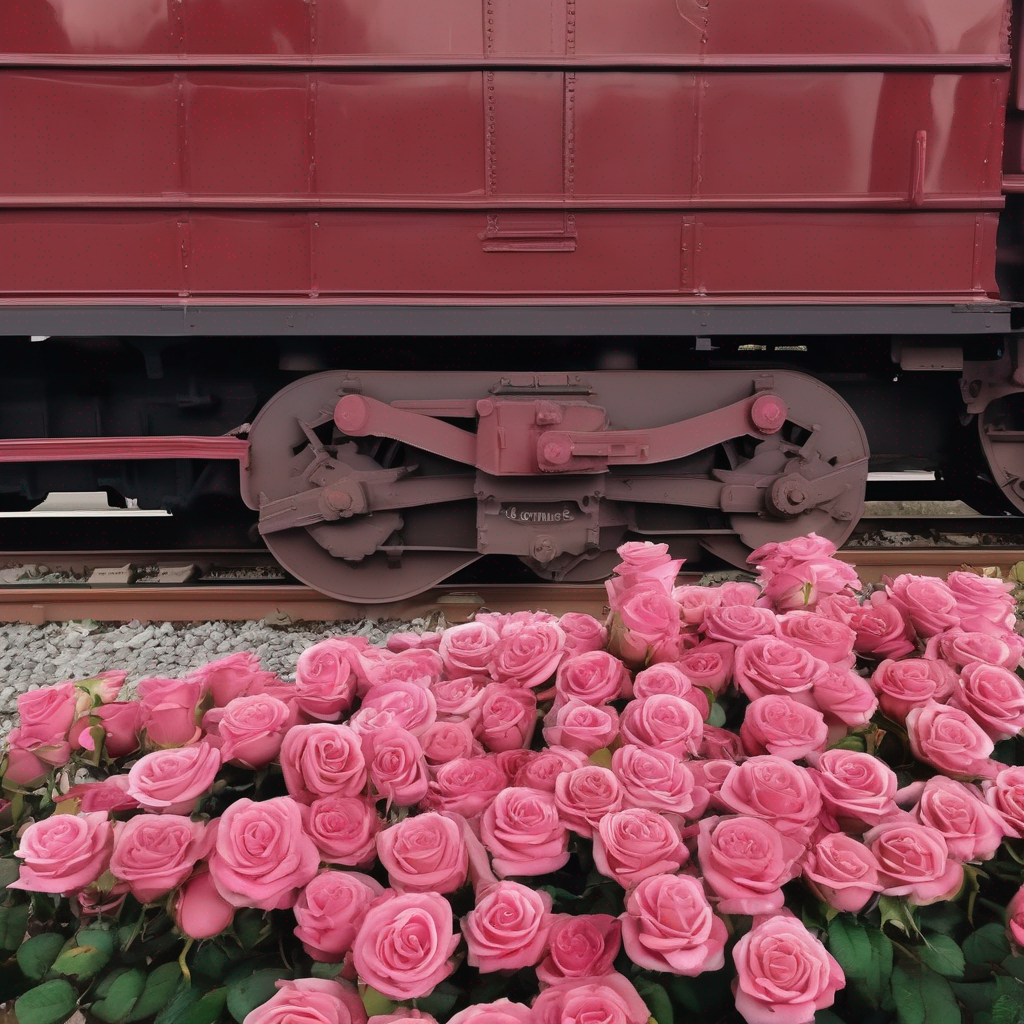

In [ ]:
#Now we can promt any text to image generation
#now create our first prompt
# now we can change the text and this time it will take as input
prompt = input("Please enter your prompt...")
seed= random.randint(0,sys.maxsize)

#get the images
images=pipe(
    prompt=prompt,
    output_type="latent" if use_refiner else "pill",
    generator=torch.Generator("cuda").manual_seed(seed)
).images

if use_refiner:
      images=refiner(
          prompt=prompt,
          image=images,
      ).images

#use f string to print
print(f"Prompt :\t{prompt}\nSeed:\t{seed}")
media.show_images(images)
#i think this is some problem, ignore that
#images[0].save("my_output_image.jpg")
